In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import charset_normalizer

In [2]:
#import dataset
original_data = pd.read_csv('/readmission/diabetic_data.csv')

original_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


因为weight这一列显示出了很多的"?"，所以我想先确认一下是不是导入的格式不对而引起的错误。

In [3]:
with open('/readmission/diabetic_data.csv','rb') as rawdata:
  result = charset_normalizer.detect(rawdata.read())
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [4]:
original_data = pd.read_csv('/readmission/diabetic_data.csv', encoding="ascii")

original_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


发现还是一样都是"?"，那么就正常先预处理数据。

In [5]:
#counting missing data
series = pd.Series(original_data.isnull().sum())
#calculate the percentage of missing data
print(series / original_data.shape[0] * 100)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

先正常计算NaN的值，以及它所占的比例。"max_glu_serum"和"A1Cresult"这两列的missing rate非常高。"max_glu_serum"只有5%左右的数据可以用，而"A1Cresult"只有17%左右的数据可以用。缺失率都高于80%。因此，直接drop这两列。

In [6]:
cleaning_data = original_data.drop(['max_glu_serum','A1Cresult'], axis=1)

cleaning_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


但就像最初提到的那样，我们可以看到数据集中有非常多的"?"，这也是缺失值的一种表示方式。所以需要知道各列"?"的值和比例。

In [7]:
#count "?"
cha_question_num = pd.Series(cleaning_data.isin(['?']).sum())
print(cha_question_num / len(cleaning_data) *100)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride 

首先，我们可以看到weight的缺失率达到了97%左右。因此，我们可以直接drop掉weight这一列。接着，我们可以看到数值也较大的payer_code和medical_specialty这两列。我们需要先判断这两列的类型，如果是分类变量，那么我们就无法使用平均值或者下一个数据覆盖等方法去代替缺失值。

In [8]:
cleaning_data['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [9]:
cleaning_data['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [10]:
#drop weight, payer_code, medical_specialty
cleaning_data = cleaning_data.drop(['weight','payer_code','medical_specialty'], axis=1)

cleaning_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


把？全都替换成NaN。

In [12]:
cleaning_data = cleaning_data.replace('?', np.nan)

cleaning_data.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


到这里，数据的预处理就结束了。

探索性分析阶段

1.什么类型的再入院情况发生最频繁？是>30天的还是<30天的，又或者是不再入院的？

In [14]:
freq = cleaning_data['readmitted'].value_counts(normalize = True).sort_index()
print(freq)

readmitted
<30    0.111599
>30    0.349282
NO     0.539119
Name: proportion, dtype: float64


<Axes: xlabel='readmitted'>

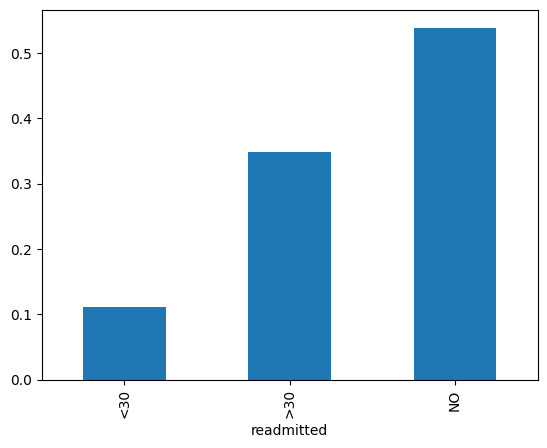

In [17]:
freq.plot.bar()

只有约10%的患者会在出院30天内再入院，35%左右的患者会在出院30天后再入院，甚至超过一半的患者在研究的时间范围内没有再入院。数据分布较为不平衡。

2. 选择性别、年龄这两个常用指标，查看分布情况。

先进行的是全部患者的性别分布。

In [18]:
cleaning_data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [19]:
freqs = cleaning_data['gender'].value_counts(normalize = True)
print(freqs)

gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


<Axes: xlabel='gender'>

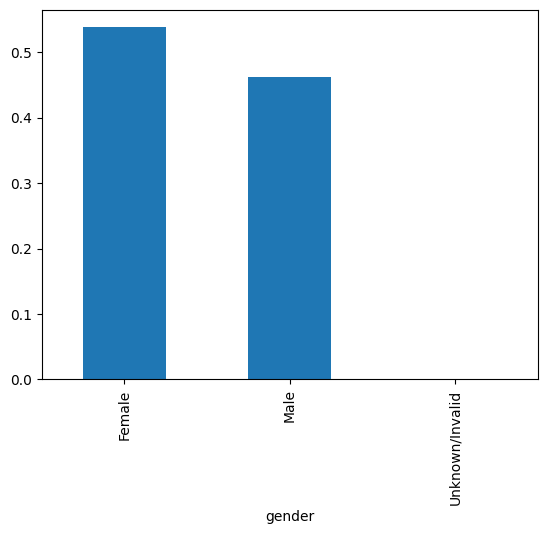

In [30]:
freqs.plot.bar()

In [31]:
cleaning_data['gender'].value_counts()

,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


我们可以发现Unknown/Invalid的患者数非常小，可以忽略不计。

接着进行再入院患者的性别分布。

<Axes: xlabel='gender'>

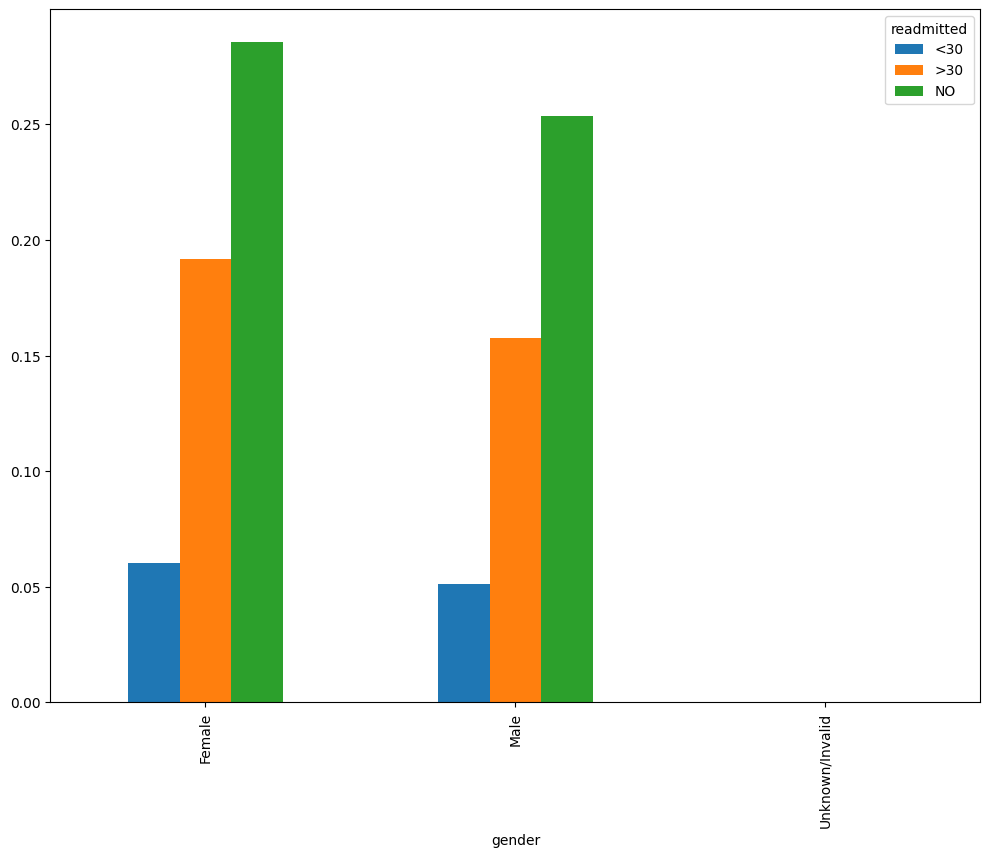

In [37]:
d = cleaning_data[['gender', 'readmitted']]

cont_table = pd.crosstab(index=d['gender'], columns=d['readmitted'], normalize=True)

cont_table.plot.bar(figsize=(12, 9))

我们可以注意到，不论男性还是女性，他们在<30天再入院的比例都是最小且近似的。但女性，在>30天再入院和未再入院的比例都比男性要高。结合前面的性别分布条形图来看，这可能是因为数据集中，女性的占比本身就较高。总体来说，再入院类型的分布情况在男女的分布上比较类似。

接着来看年龄分布。

In [35]:
cleaning_data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

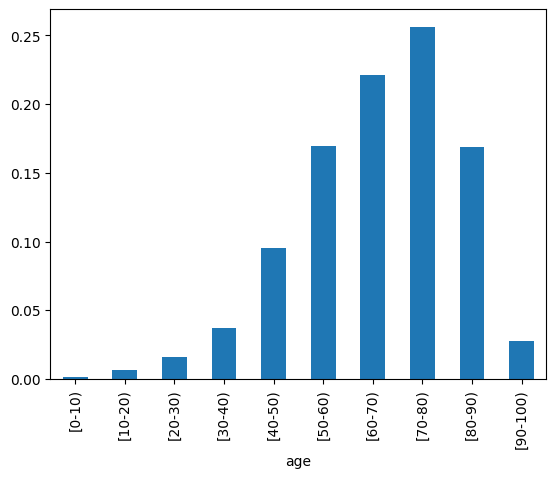

In [36]:
freqs = cleaning_data['age'].value_counts(normalize = True).sort_index().plot.bar()

<Axes: xlabel='age'>

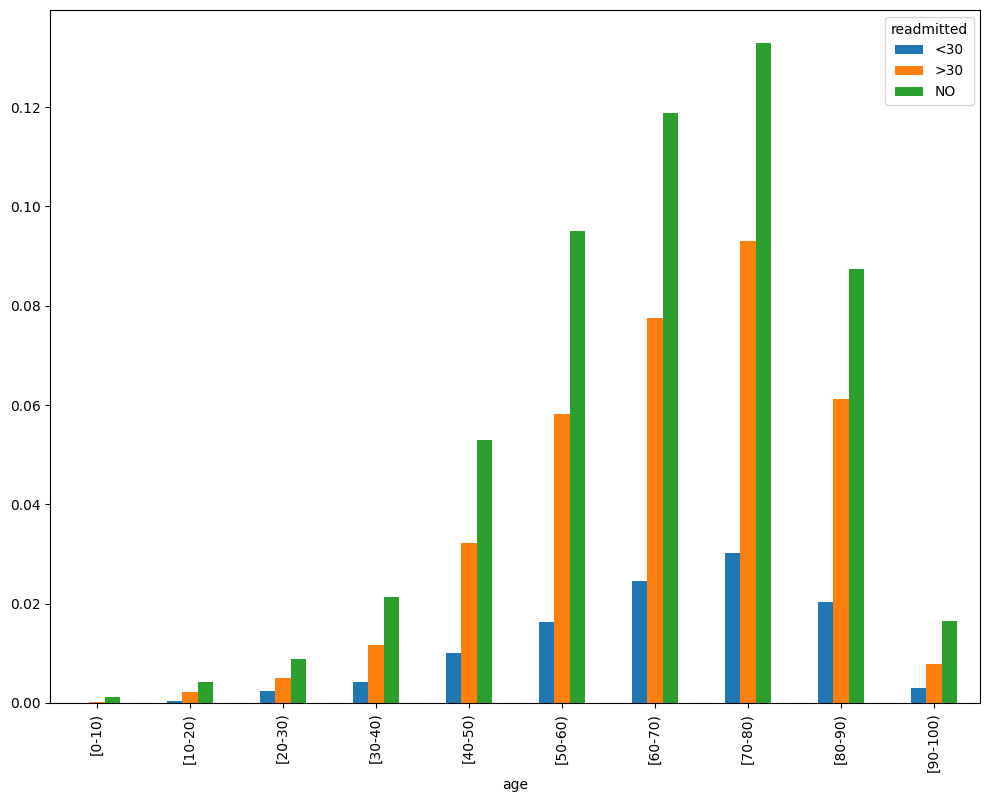

In [40]:
cont_table = pd.crosstab(index = cleaning_data['age'], columns = cleaning_data['readmitted'], normalize = True)
cont_table.plot.bar(figsize = (12, 9))

同样，各个年龄段，3种再入院类型的分布情况也十分的类似。

**准备进一步的分析**

In [41]:
cleaning_data.replace({'readmitted':{'No': 0,'>30': 1, '<30' : 2}}, inplace= True)

去掉一些行政方面的变量，例如：encounter_id之类的。以及像'examide'等列，里面所有值都是一样的。

In [42]:
cleaning_data.drop(columns=['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'examide', 'citoglipton',
                          'diag_1', 'diag_2', 'diag_3'], inplace=True)

离散值

In [44]:
numeric_cols = cleaning_data.select_dtypes(include='number').columns

In [47]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = cleaning_data[col].quantile(0.25)
    Q3 = cleaning_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((cleaning_data[col] < lower) | (cleaning_data[col] > upper)).sum()
    outlier_counts[col] = outlier_count

In [48]:
sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)
top_outlier_vars = [var for var, count in sorted_outliers if count > 0]

print("异常值较多的变量：", top_outlier_vars[:5])

异常值较多的变量： ['number_outpatient', 'number_emergency', 'number_inpatient', 'num_procedures', 'num_medications']


采用IQR法，找出了异常值最多的5个变量。接着可以采用boxplot进行更深度的分析。

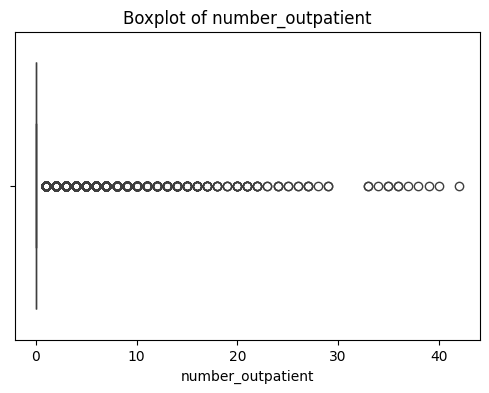

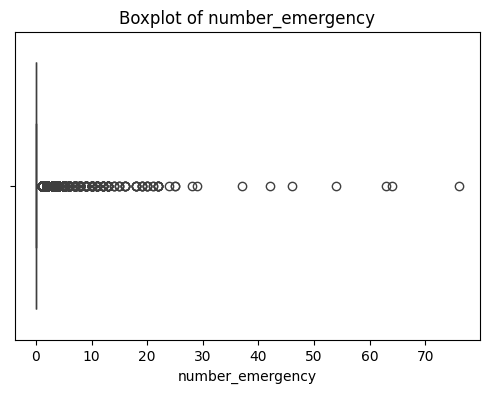

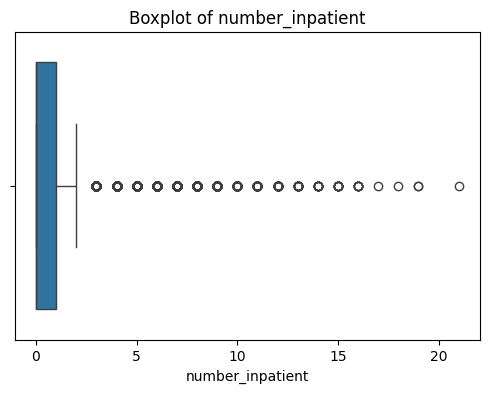

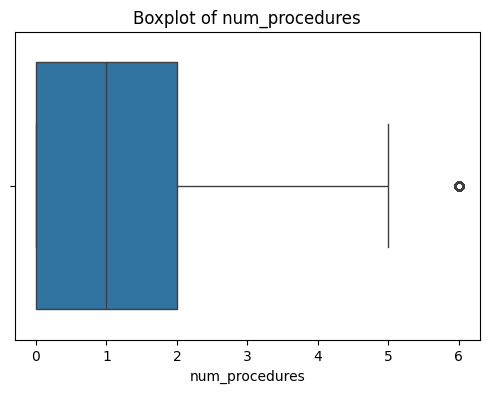

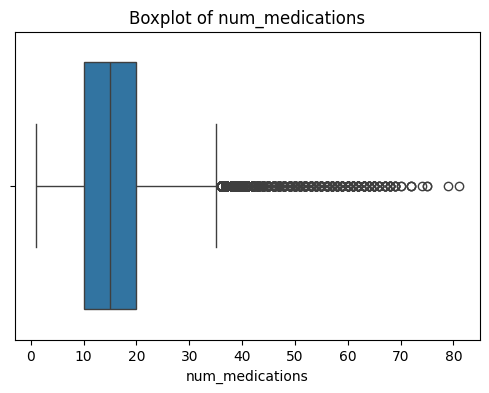

In [50]:
for col in top_outlier_vars[:5]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cleaning_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## ***##这里不知道怎么处理这些outliers***

In [43]:
cleaning_data.to_csv('cleaned.csv', index=False)